In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('MNIST Datasets.zip',compression='zip')
df.shape

(42000, 785)

In [3]:
df = df.sample(24000)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27317,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22018,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7215,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40509,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19268,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.drop(columns=['label'])
y = df['label']

In [6]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 1. applying standard scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Step 2. applying covariance matrix

In [9]:
X.shape

(24000, 784)

In [10]:
covariance_matrix = np.cov(X,rowvar=False)
print('Covariance matrix: \n',covariance_matrix)

Covariance matrix: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
covariance_matrix.shape

(784, 784)

### Step 3. Find eigenvalues and eigenvectors 

In [12]:
eigen_values , eigenvectors = np.linalg.eigh(covariance_matrix)

In [13]:
eigen_values.shape

(784,)

In [14]:
eigenvectors.shape

(784, 784)

### Step 4. Compute Feature Vectors

In [15]:
pc = eigenvectors[0:2]
pc.shape

(2, 784)

In [16]:
transformed_df = np.dot(df.iloc[:,1:],pc.T)
# 24000,784 - 784, 2

In [17]:
df.shape

(24000, 785)

### Step 5. ........

In [18]:
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['label'] = df['label'].values
new_df

,PC1,PC2,label
0,0.0,0.0,2
1,0.0,0.0,8
2,0.0,0.0,3
3,0.0,0.0,9
4,0.0,0.0,7
...,...,...,...
23995,0.0,0.0,2
23996,0.0,0.0,2
23997,0.0,0.0,0
23998,0.0,0.0,1


### Visualization

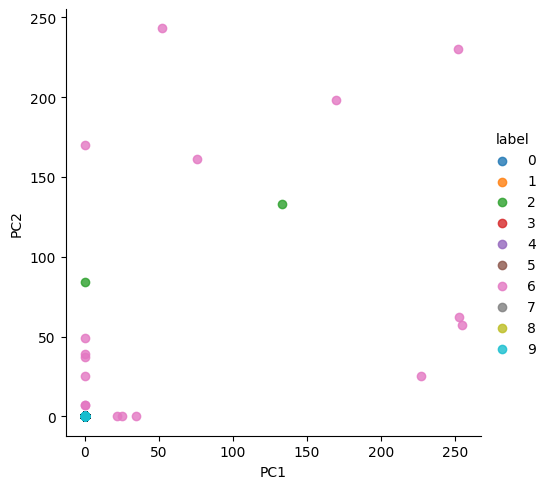

In [19]:
sns.lmplot(data=new_df, x='PC1', y='PC2', hue='label', fit_reg=False)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df[['PC1','PC2']], new_df['label'], test_size=0.33, random_state=42)

### Model building

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.11174242424242424